# Random Forest

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt  
import seaborn as sns 
from IPython.display import display

In [3]:
sns.set_style('whitegrid')
plt.style.use('seaborn-dark-palette')

In [15]:
data_01 = pd.read_csv('result/res_rf_tuned_median.csv' , index_col=0).reset_index(drop=True)
data_01.insert(0 , 'net_type' , ['rf_tuned']*len(data_01))
data_02 = pd.read_csv('result/res_rf_vanila_median.csv' , index_col=0).reset_index(drop=True)
data_02.insert(0 , 'net_type' , ['rf_vanila']*len(data_02))
data = pd.concat([data_01, data_02 ]).reset_index(drop=True)
#display(data.head(2))
feat =  pd.read_csv('result/feat_imp.csv').reset_index(drop=True)
feat


,Unnamed: 0,feat_name,feat_imp
0,0,var_inter_index,0.116844
1,1,var_inter_prob,0.098465
2,2,photflux_aper_u,0.048618
3,3,var_inter_sigma,0.043734
4,4,photflux_aper_hilim_u,0.038030
...,...,...,...
87,87,bb_stat,0.000537
88,88,bb_nh_hilim,0.000342
89,89,flux_bb_lolim,0.000243
90,90,bb_nh,0.000122


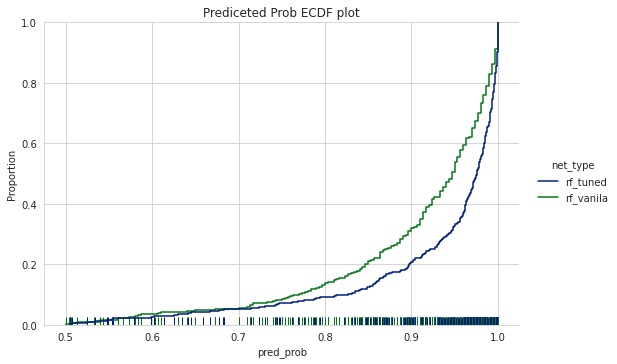

In [7]:
sns.displot(
    data = data , 
    x = 'pred_prob' , 
    kind = 'ecdf', 
    hue = 'net_type' , 
    rug=True , 
    height=5 , aspect=6/4
)
plt.title('Prediceted Prob ECDF plot')

plt.savefig('result/prob_comparison.jpg')
plt.show()

In [8]:
data = data[data['net_type']=='rf_tuned']
x_data = data.copy().reset_index(drop=True)
x_data = x_data.drop(columns=['true_class' , 'pred_class' , 'pred_prob' ,'src_id' , 'src_n' ,'truth' , 'th_class' , 'is_ok' , 'clf_type' , 'NS_prob' , 'BH_prob' , 'net_type'])
x_data.head(2)



,var_inter_index,var_inter_prob,photflux_aper_u,var_inter_sigma,photflux_aper_hilim_u,var_max,var_mean,flux_aper_hilim_h,var_min,hard_hs_lolim,...,brems_stat,flux_brems,flux_powlaw,powlaw_stat,bb_kt_hilim,bb_stat,bb_nh_hilim,flux_bb_lolim,bb_nh,bb_nh_lolim
0,0.3,0.387872,0.391946,0.000012,0.126772,0.000168,0.000706,0.269623,0.000576,0.229537,...,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,0.391946,3.919457e-01,0.391946
1,1.0,1.000000,0.550496,0.000329,0.599817,0.004573,0.030587,0.647738,0.027086,0.410263,...,0.043549,0.042389,0.041554,0.053613,0.005755,0.383370,0.001446,0.026640,1.543364e-09,0.391946


## Result

In [9]:
total = len(data)
print('Total samples' , total)
am_clf = len(data[data['th_class']=='X'])
print('Ambiguous calssification : ' , am_clf)
wrong_clf = len(data[data['truth']==0])
print('Wrong calssification : ' , wrong_clf)

Total samples 460
Ambiguous calssification :  42
Wrong calssification :  0


## Probability Correlation

In [10]:
res_bh = data[data['pred_class'] == 'BH'].drop(columns=['NS_prob' , 'BH_prob'])
res_ns = data[data['pred_class'] == 'NS'].drop(columns=['NS_prob' , 'BH_prob'])
th_x = data[data['th_class'] == 'X'].drop(columns=['NS_prob' , 'BH_prob'])
th_bh = data[data['th_class'] == 'BH'].drop(columns=['NS_prob' , 'BH_prob'])
th_ns = data[data['th_class'] == 'NS'].drop(columns=['NS_prob' , 'BH_prob'])

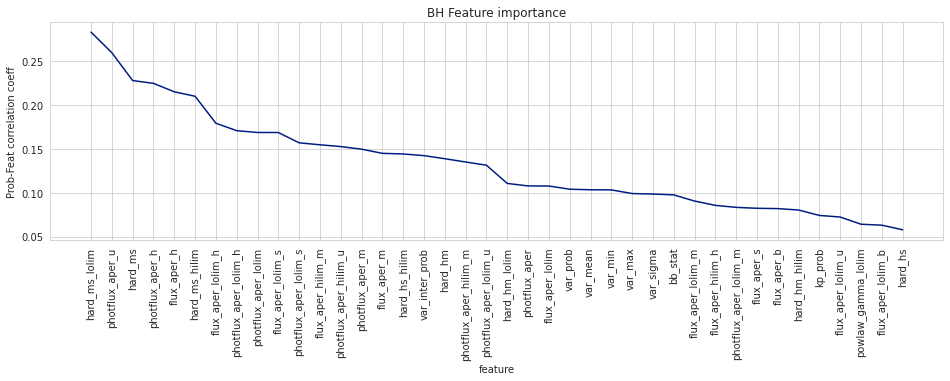

In [11]:
th_bh_corr = th_bh.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_bh_corr = th_bh_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
#display(th_bh_corr)
feat_num = 40
feat_names = th_bh_corr.index.to_list()[:feat_num]
feat_values = th_bh_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/bh_feat_imp.jpg')
plt.title('BH Feature importance')
#plt.subplots_adjust(bottom=0.8)

plt.show()

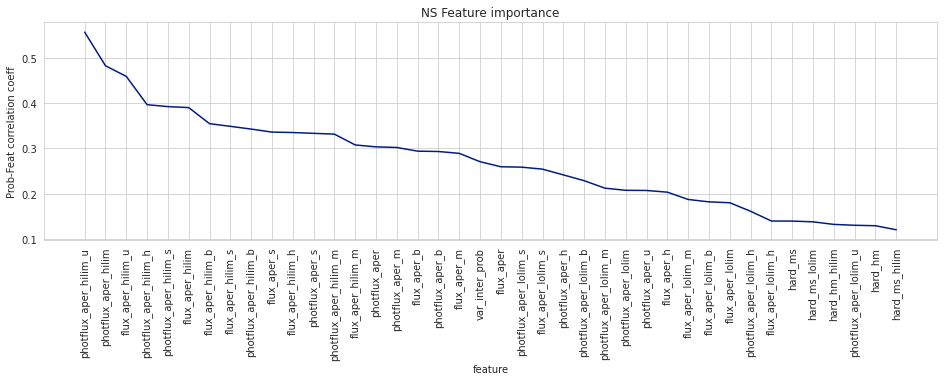

In [12]:
th_ns_corr = th_ns.corr().dropna(how='all' , axis=0).dropna(how='all' , axis=1).abs()
th_ns_corr = th_ns_corr[['pred_prob']][2:].sort_values(by='pred_prob' , ascending=False)
feat_num = 40
feat_names = th_ns_corr.index.to_list()[:feat_num]
feat_values = th_ns_corr['pred_prob'][:feat_num]
plt.figure(figsize=(16 , 4))
plt.plot(feat_names , feat_values)
plt.xticks(rotation=90)
plt.ylabel('Prob-Feat correlation coeff')
plt.xlabel('feature')
plt.savefig('result/ns_feat_imp.jpg')
plt.title('NS Feature importance')
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

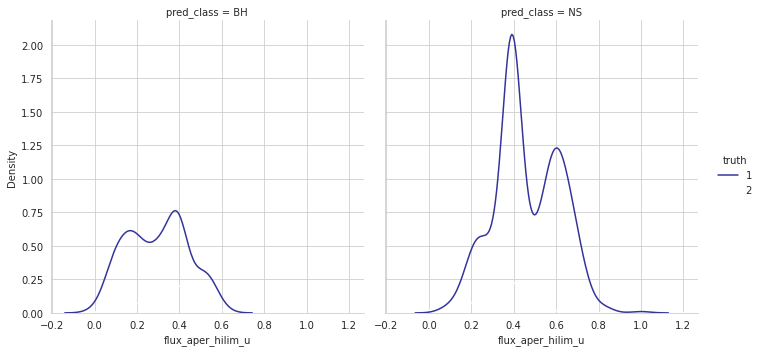

In [35]:

ax = sns.displot(
    data = data , kind='kde',
    x = 'flux_aper_hilim_u' ,# y = 'flux_aper_hilim_u' , 
    hue = 'truth' , 
    col = 'pred_class' , 
    palette = 'terrain'
)

plt.show()

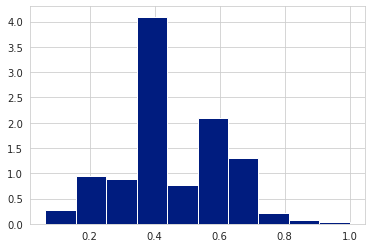

In [37]:
x1 = data[data['pred_class']=='NS']['flux_aper_hilim_u']
x2 = data[data['pred_class']=='BH']['flux_aper_hilim_u']
ax = plt.hist(x1 , density=True)
